In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
import os

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='linear'))  # Output layer with 4 values

    return model

input_shape = (128, 128, 1)
cnn_model = create_cnn_model(input_shape)
cnn_model.compile(optimizer='adam', loss='mse')  # Compile the model


In [ ]:
import cv2
import numpy as np

def preprocess_image(image_path, image_size=(128, 128)):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale
    img = cv2.resize(img, image_size)  # Resize the image to the input size
    img = img / 255.0  # Normalize pixel values to [0,1]
    img = img.reshape(1, image_size[0], image_size[1], 1)  # Add batch and channel dimensions
    return img

# Load and preprocess the single image
image_path = '/content/01_L.bmp'
image = preprocess_image(image_path)


In [ ]:
# Extract feature vector
features = cnn_model.predict(image)

# Format and print the feature vector
print("Feature Vector for Iris Image 1:")
print(features[0])  # Print only the feature vector for the single image


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Feature Vector for Iris Image 1:
[-0.00742859  0.06430073  0.05230698  0.0741035 ]


In [ ]:
#not homomorphic encryption

import cv2
import numpy as np
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
import base64
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN model for feature extraction
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='linear'))  # Output layer with 4 values
    return model

# Load and preprocess the single image
def preprocess_image(image_path, image_size=(128, 128)):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale
    if img is None:
        print(f"Error: Could not load image from {image_path}.")
        return None
    img = cv2.resize(img, image_size)  # Resize the image to the input size
    img = img / 255.0  # Normalize pixel values to [0,1]
    img = img.reshape(1, image_size[0], image_size[1], 1)  # Add batch and channel dimensions
    return img

# Function to extract features using the CNN model
def extract_cnn_features(image_path, cnn_model):
    image = preprocess_image(image_path)
    if image is None:
        return None
    features = cnn_model.predict(image)
    return features[0]  # Return the feature vector for the single image

# Encryption and decryption functions remain the same
def encrypt_data(data, key):
    nonce = os.urandom(12)  # Generate a random nonce
    cipher = Cipher(algorithms.AES(key), modes.GCM(nonce), backend=default_backend())
    encryptor = cipher.encryptor()
    encrypted_data = encryptor.update(data) + encryptor.finalize()
    return encrypted_data, encryptor.tag, nonce

def decrypt_data(encrypted_data, key, tag, nonce):
    cipher = Cipher(algorithms.AES(key), modes.GCM(nonce, tag), backend=default_backend())
    decryptor = cipher.decryptor()
    decrypted_data = decryptor.update(encrypted_data) + decryptor.finalize()
    return decrypted_data

# Binary conversion and Hamming distance functions remain the same
def binary_to_bytes(binary_code):
    return binary_code.tobytes()

def bytes_to_binary(byte_data, length):
    return np.frombuffer(byte_data, dtype=np.uint8)[:length]

def hamming_distance(code1, code2):
    if code1.shape != code2.shape:
        raise ValueError("Binary codes must have the same length.")
    return np.sum(code1 != code2)

# Main execution
input_shape = (128, 128, 1)
cnn_model = create_cnn_model(input_shape)
cnn_model.compile(optimizer='adam', loss='mse')  # Compile the model

# Specify the paths for two iris images
image_path_1 = '/content/01_L.bmp'
image_path_2 = '/content/01_L.bmp'

# Extract CNN features
iris_code_1 = extract_cnn_features(image_path_1, cnn_model)
iris_code_2 = extract_cnn_features(image_path_2, cnn_model)

if iris_code_1 is not None and iris_code_2 is not None:
    # Print the feature vectors (iris codes) of the two images
    print("\nFeature Vector for Iris Image 1:")
    print(iris_code_1)

    print("\nFeature Vector for Iris Image 2:")
    print(iris_code_2)

    # Encryption key (16 bytes for AES-128)
    key = b'Sixteen byte key'

    # Convert iris codes to bytes for encryption
    binary_code_1 = binary_to_bytes(iris_code_1.astype(np.uint8))  # Convert float features to uint8
    binary_code_2 = binary_to_bytes(iris_code_2.astype(np.uint8))

    # Encrypt the iris codes
    encrypted_code_1, tag_1, nonce_1 = encrypt_data(binary_code_1, key)
    encrypted_code_2, tag_2, nonce_2 = encrypt_data(binary_code_2, key)

    # Print encrypted values
    print("\nEncrypted Iris Code 1:")
    print(base64.b64encode(encrypted_code_1).decode('utf-8'))

    print("\nEncrypted Iris Code 2:")
    print(base64.b64encode(encrypted_code_2).decode('utf-8'))

    # Decrypt the iris codes
    decrypted_code_1 = decrypt_data(encrypted_code_1, key, tag_1, nonce_1)
    decrypted_code_2 = decrypt_data(encrypted_code_2, key, tag_2, nonce_2)

    # Convert the decrypted bytes back to binary iris code
    decrypted_iris_code_1 = bytes_to_binary(decrypted_code_1, len(binary_code_1))
    decrypted_iris_code_2 = bytes_to_binary(decrypted_code_2, len(binary_code_2))

    # Calculate Hamming distance between the two iris codes
    distance = hamming_distance(decrypted_iris_code_1, decrypted_iris_code_2)
    print(f"\nHamming distance between the two iris codes: {distance}")

    # Define a threshold for matching
    matching_threshold = 2

    # Check if the iris codes match
    if distance <= matching_threshold:
        print("The iris codes match.")
    else:
        print("The iris codes do not match.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

Feature Vector for Iris Image 1:
[ 0.05418351 -0.03201402  0.07084487  0.00417542]

Feature Vector for Iris Image 2:
[ 0.05418351 -0.03201402  0.07084487  0.00417542]

Encrypted Iris Code 1:
cJZ06w==

Encrypted Iris Code 2:
hg1F5g==

Hamming distance between the two iris codes: 0
The iris codes match.


In [ ]:
!pip install tenseal

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 34.4 MB/s eta 0:00:00


In [ ]:
#CKKS ENCRYPTION

import cv2
import numpy as np
import base64
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tenseal as ts

# Define CNN model for feature extraction
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='linear'))  # Output layer with 4 values
    return model

# Load and preprocess the single image
def preprocess_image(image_path, image_size=(128, 128)):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale
    if img is None:
        print(f"Error: Could not load image from {image_path}.")
        return None
    img = cv2.resize(img, image_size)  # Resize the image to the input size
    img = img / 255.0  # Normalize pixel values to [0,1]
    img = img.reshape(1, image_size[0], image_size[1], 1)  # Add batch and channel dimensions
    return img

# Function to extract features using the CNN model
def extract_cnn_features(image_path, cnn_model):
    image = preprocess_image(image_path)
    if image is None:
        return None
    features = cnn_model.predict(image)
    return features[0]  # Return the feature vector for the single image

# Homomorphic encryption setup with TenSEAL
def setup_homomorphic_encryption():
    context = ts.context(
        ts.SCHEME_TYPE.CKKS,
        poly_modulus_degree=8192,
        coeff_mod_bit_sizes=[60, 40, 40, 60]
    )
    context.global_scale = 2**40
    context.generate_galois_keys()
    return context

# Encrypt feature vector
def encrypt_feature_vector(feature_vector, context):
    return ts.ckks_vector(context, feature_vector)

# Compute squared differences and sum them homomorphically
def compute_encrypted_distance(ciphertext1, ciphertext2):
    diff = ciphertext1 - ciphertext2
    squared_diff = diff * diff
    return squared_diff.sum()

# Main execution
input_shape = (128, 128, 1)
cnn_model = create_cnn_model(input_shape)
cnn_model.compile(optimizer='adam', loss='mse')  # Compile the model

# Specify the paths for two iris images
image_path_1 = '/content/01_L.bmp'
image_path_2 = '/content/01_L.bmp'

# Extract CNN features
iris_code_1 = extract_cnn_features(image_path_1, cnn_model)
iris_code_2 = extract_cnn_features(image_path_2, cnn_model)

if iris_code_1 is not None and iris_code_2 is not None:
    print("\nFeature Vector for Iris Image 1:", iris_code_1)
    print("Feature Vector for Iris Image 2:", iris_code_2)

    # Homomorphic encryption setup
    context = setup_homomorphic_encryption()

    # Encrypt feature vectors
    ciphertext_1 = encrypt_feature_vector(iris_code_1, context)
    ciphertext_2 = encrypt_feature_vector(iris_code_2, context)

    # Compute encrypted distance
    encrypted_distance = compute_encrypted_distance(ciphertext_1, ciphertext_2)

    print("\nEncrypted distance between feature vectors has been computed.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

Feature Vector for Iris Image 1: [ 0.04757713 -0.03723646  0.04392038 -0.00076597]
Feature Vector for Iris Image 2: [ 0.04757713 -0.03723646  0.04392038 -0.00076597]

Encrypted distance between feature vectors has been computed.


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tenseal as ts

# Define CNN model for feature extraction
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='linear'))  # Output layer with 4 values
    return model

# Load and preprocess the single image
def preprocess_image(image_path, image_size=(128, 128)):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale
    if img is None:
        print(f"Error: Could not load image from {image_path}.")
        return None
    img = cv2.resize(img, image_size)  # Resize the image to the input size
    img = img / 255.0  # Normalize pixel values to [0,1]
    img = img.reshape(1, image_size[0], image_size[1], 1)  # Add batch and channel dimensions
    return img

# Function to extract features using the CNN model
def extract_cnn_features(image_path, cnn_model):
    image = preprocess_image(image_path)
    if image is None:
        return None
    features = cnn_model.predict(image)
    return features[0]  # Return the feature vector for the single image

# Homomorphic encryption setup with BFV
def setup_homomorphic_encryption_bfv():
    context = ts.context(
        ts.SCHEME_TYPE.BFV,
        poly_modulus_degree=8192,
        plain_modulus=786433  # Large prime modulus
    )
    context.generate_galois_keys()
    return context

# Scale and convert feature vector to integers
def scale_and_convert_to_integers(feature_vector, scale_factor=1e6):
    return (feature_vector * scale_factor).astype(np.int64)

# Encrypt feature vector
def encrypt_feature_vector_bfv(feature_vector, context):
    return [ts.bfv_vector(context, [x]) for x in feature_vector]

# Compute squared differences and sum them homomorphically
def compute_encrypted_distance_bfv(ciphertext1, ciphertext2):
    squared_diffs = [
        (c1 - c2) * (c1 - c2) for c1, c2 in zip(ciphertext1, ciphertext2)
    ]
    result = squared_diffs[0]
    for sd in squared_diffs[1:]:
        result += sd
    return result

# Main execution
input_shape = (128, 128, 1)
cnn_model = create_cnn_model(input_shape)
cnn_model.compile(optimizer='adam', loss='mse')  # Compile the model

# Specify the paths for two iris images
image_path_1 = '/content/01_L.bmp'
image_path_2 = '/content/01_L.bmp'

# Extract CNN features
iris_code_1 = extract_cnn_features(image_path_1, cnn_model)
iris_code_2 = extract_cnn_features(image_path_2, cnn_model)

if iris_code_1 is not None and iris_code_2 is not None:
    print("\nFeature Vector for Iris Image 1:", iris_code_1)
    print("Feature Vector for Iris Image 2:", iris_code_2)

    # Homomorphic encryption setup for BFV
    context = setup_homomorphic_encryption_bfv()

    # Scale and convert feature vectors to integers
    scale_factor = 1e6
    iris_code_1_scaled = scale_and_convert_to_integers(iris_code_1, scale_factor)
    iris_code_2_scaled = scale_and_convert_to_integers(iris_code_2, scale_factor)

    # Encrypt feature vectors
    ciphertext_1 = encrypt_feature_vector_bfv(iris_code_1_scaled, context)
    ciphertext_2 = encrypt_feature_vector_bfv(iris_code_2_scaled, context)

    # Compute encrypted distance
    encrypted_distance = compute_encrypted_distance_bfv(ciphertext_1, ciphertext_2)

    print("\nEncrypted distance between feature vectors (BFV):")
    print(encrypted_distance)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

Feature Vector for Iris Image 1: [ 0.02603113  0.07839664  0.08271082 -0.05692406]
Feature Vector for Iris Image 2: [ 0.02603113  0.07839664  0.08271082 -0.05692406]

Encrypted distance between feature vectors (BFV):


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


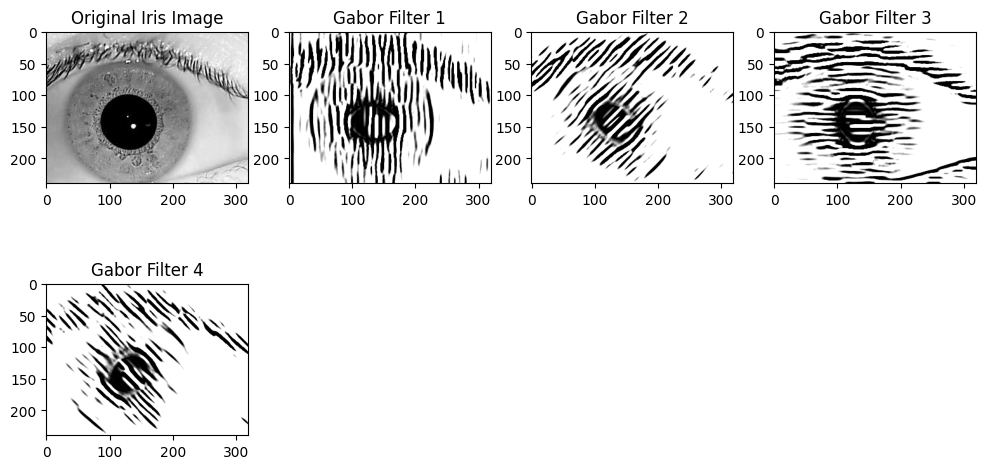

Combined Feature Vector (CNN + Gabor): [ 1.07252663e-02 -8.07950944e-02 -2.47319024e-02  2.04703659e-02
  1.87653529e+02  2.13702656e+02  1.90883555e+02  2.17477057e+02]


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Define CNN model for feature extraction
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='linear'))  # Output layer with 4 values
    return model

# Load and preprocess the single image
def preprocess_image(image_path, image_size=(128, 128)):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale
    if img is None:
        print(f"Error: Could not load image from {image_path}.")
        return None
    img = cv2.resize(img, image_size)  # Resize the image to the input size
    img = img / 255.0  # Normalize pixel values to [0,1]
    img = img.reshape(1, image_size[0], image_size[1], 1)  # Add batch and channel dimensions
    return img

# Function to extract features using the CNN model
def extract_cnn_features(image_path, cnn_model):
    image = preprocess_image(image_path)
    if image is None:
        return None
    features = cnn_model.predict(image)
    return features[0]  # Return the feature vector for the single image

# Function to generate a Gabor filter
def build_gabor_filter(ksize, sigma, theta, lambd, gamma, psi):
    return cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi, ktype=cv2.CV_32F)

# Function to apply Gabor filter to an image
def apply_gabor_filters(image, filters):
    filtered_images = []
    for kernel in filters:
        filtered_img = cv2.filter2D(image, cv2.CV_8UC3, kernel)
        filtered_images.append(filtered_img)
    return filtered_images

# Function to extract features from Gabor filter responses
def extract_features_from_responses(filtered_images):
    feature_vector = []
    for img in filtered_images:
        feature_vector.append(np.mean(img))  # Using the mean of the response as the feature
    return np.array(feature_vector)

# Main execution
image_path = '/content/01_L.bmp'  # Path for the image
input_shape = (128, 128, 1)

# Load and compile CNN model
cnn_model = create_cnn_model(input_shape)
cnn_model.compile(optimizer='adam', loss='mse')

# Extract CNN features
cnn_features = extract_cnn_features(image_path, cnn_model)

# Load the image and apply Gabor filters
iris_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if iris_image is None:
    print(f"Error: Could not load image {image_path}.")
else:
    # Define Gabor filter parameters
    ksize = 31
    sigma = 5.0
    lambd = 10.0
    gamma = 0.5
    psi = 0

    # Generate Gabor filters with different orientations
    thetas = np.arange(0, np.pi, np.pi/4)  # Orientations: 0, 45, 90, 135 degrees
    filters = [build_gabor_filter(ksize, sigma, theta, lambd, gamma, psi) for theta in thetas]

    # Apply Gabor filters to the single iris image
    filtered_images = apply_gabor_filters(iris_image, filters)

    # Extract features from the filtered responses
    gabor_features = extract_features_from_responses(filtered_images)

    # Combine CNN features and Gabor filter features
    combined_features = np.concatenate((cnn_features, gabor_features), axis=0)

    # Display the original and filtered images
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 4, 1)
    plt.imshow(iris_image, cmap='gray')
    plt.title('Original Iris Image')

    # Show the Gabor filtered results
    for i, result in enumerate(filtered_images):
        plt.subplot(2, 4, i+2)
        plt.imshow(result, cmap='gray')
        plt.title(f'Gabor Filter {i+1}')

    plt.show()

    # Print the extracted combined features
    print(f"Combined Feature Vector (CNN + Gabor): {combined_features}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Encrypted feature vector has been saved to 'encrypted_combined_features.bfv'.


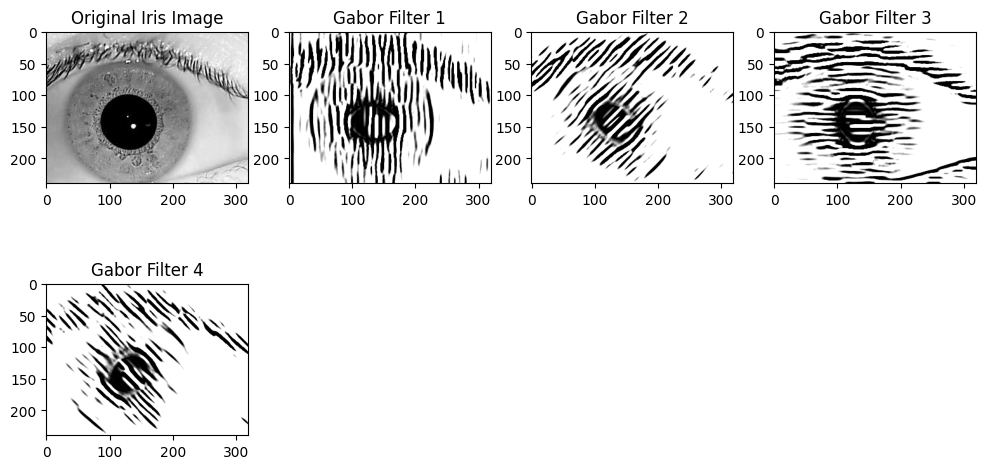

Combined Encrypted Feature Vector (CNN + Gabor) has been saved.


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import tenseal as ts
import pickle  # To save encrypted features

# Define CNN model for feature extraction
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='linear'))  # Output layer with 4 values
    return model

# Load and preprocess the single image
def preprocess_image(image_path, image_size=(128, 128)):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale
    if img is None:
        print(f"Error: Could not load image from {image_path}.")
        return None
    img = cv2.resize(img, image_size)  # Resize the image to the input size
    img = img / 255.0  # Normalize pixel values to [0,1]
    img = img.reshape(1, image_size[0], image_size[1], 1)  # Add batch and channel dimensions
    return img

# Function to extract features using the CNN model
def extract_cnn_features(image_path, cnn_model):
    image = preprocess_image(image_path)
    if image is None:
        return None
    features = cnn_model.predict(image)
    return features[0]  # Return the feature vector for the single image

# Function to generate a Gabor filter
def build_gabor_filter(ksize, sigma, theta, lambd, gamma, psi):
    return cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi, ktype=cv2.CV_32F)

# Function to apply Gabor filter to an image
def apply_gabor_filters(image, filters):
    filtered_images = []
    for kernel in filters:
        filtered_img = cv2.filter2D(image, cv2.CV_8UC3, kernel)
        filtered_images.append(filtered_img)
    return filtered_images

# Function to extract features from Gabor filter responses
def extract_features_from_responses(filtered_images):
    feature_vector = []
    for img in filtered_images:
        feature_vector.append(np.mean(img))  # Using the mean of the response as the feature
    return np.array(feature_vector)

# Function to setup BFV homomorphic encryption
def setup_bfv_encryption():
    # Set the plain_modulus to a prime number
    plain_modulus = 786433  # Example value, you can choose a different prime based on your requirements

    context = ts.context(
        ts.SCHEME_TYPE.BFV,
        poly_modulus_degree=8192,
        coeff_mod_bit_sizes=[60, 40, 40, 60],
        plain_modulus=plain_modulus  # Providing plain_modulus parameter
    )
    context.generate_galois_keys()
    return context

# Function to encrypt a feature vector
def encrypt_feature_vector_bfv(feature_vector, context):
    # Flatten the feature vector to 1D for encryption
    feature_vector = feature_vector.flatten()
    return ts.bfv_vector(context, feature_vector)

# Save encrypted features using TenSEAL serialization
def save_encrypted_features(encrypted_features, filename):
    # Serialize the BFVVector to bytes
    serialized_data = encrypted_features.serialize()
    with open(filename, 'wb') as file:
        file.write(serialized_data)

# Main execution
image_path = '/content/01_L.bmp'  # Path for the image
input_shape = (128, 128, 1)

# Load and compile CNN model
cnn_model = create_cnn_model(input_shape)
cnn_model.compile(optimizer='adam', loss='mse')

# Extract CNN features
cnn_features = extract_cnn_features(image_path, cnn_model)

# Load the image and apply Gabor filters
iris_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if iris_image is None:
    print(f"Error: Could not load image {image_path}.")
else:
    # Define Gabor filter parameters
    ksize = 31
    sigma = 5.0
    lambd = 10.0
    gamma = 0.5
    psi = 0

    # Generate Gabor filters with different orientations
    thetas = np.arange(0, np.pi, np.pi/4)  # Orientations: 0, 45, 90, 135 degrees
    filters = [build_gabor_filter(ksize, sigma, theta, lambd, gamma, psi) for theta in thetas]

    # Apply Gabor filters to the single iris image
    filtered_images = apply_gabor_filters(iris_image, filters)

    # Extract features from the filtered responses
    gabor_features = extract_features_from_responses(filtered_images)

    # Combine CNN features and Gabor filter features
    combined_features = np.concatenate((cnn_features, gabor_features), axis=0)

    # Set up BFV encryption
    context = setup_bfv_encryption()

    # Encrypt the combined feature vector
    encrypted_combined_features = encrypt_feature_vector_bfv(combined_features, context)

    # Save the encrypted features to a file
    save_encrypted_features(encrypted_combined_features, 'encrypted_combined_features.bfv')

    print("Encrypted feature vector has been saved to 'encrypted_combined_features.bfv'.")

    # Display the original and filtered images
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 4, 1)
    plt.imshow(iris_image, cmap='gray')
    plt.title('Original Iris Image')

    # Show the Gabor filtered results
    for i, result in enumerate(filtered_images):
        plt.subplot(2, 4, i+2)
        plt.imshow(result, cmap='gray')
        plt.title(f'Gabor Filter {i+1}')

    plt.show()

    # Print the combined encrypted feature vector
    print(f"Combined Encrypted Feature Vector (CNN + Gabor) has been saved.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
Encrypted feature vector has been saved to 'encrypted_combined_features.bfv'.
SHA-256 Hash of Encrypted Feature Vector: d2367668dc8233616badf24a4b1850101fb43f61a5537b283f2fdcab61b772ea


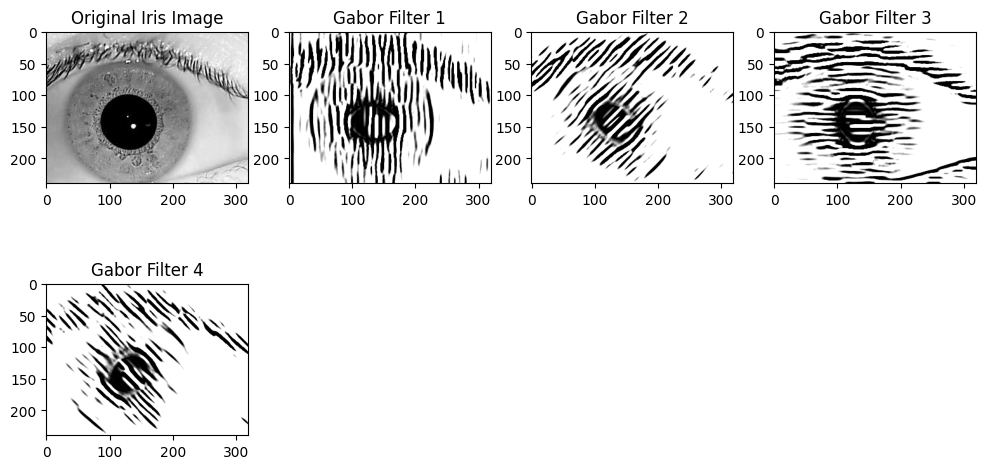

Combined Encrypted Feature Vector (CNN + Gabor) has been saved.


In [ ]:
import hashlib

# Function to compute SHA-256 hash of the encrypted feature vector
def compute_sha256_hash(serialized_data):
    sha256_hash = hashlib.sha256()
    sha256_hash.update(serialized_data)  # Update the hash with the serialized data
    return sha256_hash.hexdigest()  # Return the hexadecimal representation of the hash

# Main execution
image_path = '/content/01_L.bmp'  # Path for the image
input_shape = (128, 128, 1)

# Load and compile CNN model
cnn_model = create_cnn_model(input_shape)
cnn_model.compile(optimizer='adam', loss='mse')

# Extract CNN features
cnn_features = extract_cnn_features(image_path, cnn_model)

# Load the image and apply Gabor filters
iris_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if iris_image is None:
    print(f"Error: Could not load image {image_path}.")
else:
    # Define Gabor filter parameters
    ksize = 31
    sigma = 5.0
    lambd = 10.0
    gamma = 0.5
    psi = 0

    # Generate Gabor filters with different orientations
    thetas = np.arange(0, np.pi, np.pi/4)  # Orientations: 0, 45, 90, 135 degrees
    filters = [build_gabor_filter(ksize, sigma, theta, lambd, gamma, psi) for theta in thetas]

    # Apply Gabor filters to the single iris image
    filtered_images = apply_gabor_filters(iris_image, filters)

    # Extract features from the filtered responses
    gabor_features = extract_features_from_responses(filtered_images)

    # Combine CNN features and Gabor filter features
    combined_features = np.concatenate((cnn_features, gabor_features), axis=0)

    # Set up BFV encryption
    context = setup_bfv_encryption()

    # Encrypt the combined feature vector
    encrypted_combined_features = encrypt_feature_vector_bfv(combined_features, context)

    # Save the encrypted features to a file
    save_encrypted_features(encrypted_combined_features, 'encrypted_combined_features.bfv')

    print("Encrypted feature vector has been saved to 'encrypted_combined_features.bfv'.")

    # Serialize the encrypted features to bytes
    serialized_data = encrypted_combined_features.serialize()

    # Compute the SHA-256 hash of the serialized encrypted data
    sha256_hash = compute_sha256_hash(serialized_data)

    # Print the SHA-256 hash
    print(f"SHA-256 Hash of Encrypted Feature Vector: {sha256_hash}")

    # Save the SHA-256 hash to a file (optional)
    with open('encrypted_features_sha256_hash.txt', 'w') as hash_file:
        hash_file.write(sha256_hash)

    # Display the original and filtered images
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 4, 1)
    plt.imshow(iris_image, cmap='gray')
    plt.title('Original Iris Image')

    # Show the Gabor filtered results
    for i, result in enumerate(filtered_images):
        plt.subplot(2, 4, i+2)
        plt.imshow(result, cmap='gray')
        plt.title(f'Gabor Filter {i+1}')

    plt.show()

    # Print the combined encrypted feature vector
    print(f"Combined Encrypted Feature Vector (CNN + Gabor) has been saved.")


In [ ]:
# Save encrypted features and SHA-256 hash to a file
def save_encrypted_features_with_hash(encrypted_features, sha256_hash, filename):
    # Serialize the BFVVector to bytes
    serialized_data = encrypted_features.serialize()

    # Open the file in binary mode
    with open(filename, 'wb') as file:
        # Write the encrypted feature data
        file.write(serialized_data)

        # Write the SHA-256 hash to the file after the encrypted data
        file.write(sha256_hash.encode())  # Ensure hash is in byte format
    print(f"Encrypted feature vector and SHA-256 hash have been saved to '{filename}'.")


In [ ]:
# Serialize the encrypted features to bytes
serialized_data = encrypted_combined_features.serialize()

# Compute the SHA-256 hash of the serialized encrypted data
sha256_hash = compute_sha256_hash(serialized_data)

# Save both the encrypted feature vector and SHA-256 hash to a file
save_encrypted_features_with_hash(encrypted_combined_features, sha256_hash, 'encrypted_combined_features_with_hash.bfv')


Encrypted feature vector and SHA-256 hash have been saved to 'encrypted_combined_features_with_hash.bfv'.


In [ ]:
# Function to load encrypted features and SHA-256 hash from a file
def load_encrypted_features_and_hash(filename):
    with open(filename, 'rb') as file:
        # Read the serialized encrypted feature data
        serialized_data = file.read()[:-64]  # Assuming SHA-256 hash is 64 bytes
        # Read the SHA-256 hash (last 64 bytes)
        stored_hash = file.read(64).decode()  # Decode from byte to string
    return serialized_data, stored_hash

# Function to verify the encrypted features
def verify_encrypted_features(serialized_data, stored_hash):
    # Recompute the SHA-256 hash of the encrypted data
    computed_hash = compute_sha256_hash(serialized_data)

    # Compare the computed hash with the stored hash
    if computed_hash == stored_hash:
        print("Verification Successful: The encrypted feature vector is authentic.")
    else:
        print("Verification Failed: The encrypted feature vector has been tampered with.")

# Verification process
# Load the encrypted features and stored hash from the file
encrypted_data, stored_hash = load_encrypted_features_and_hash('encrypted_combined_features_with_hash.bfv')

# Verify the encrypted features
verify_encrypted_features(encrypted_data, stored_hash)


Verification Failed: The encrypted feature vector has been tampered with.


In [ ]:
import hashlib

# Function to compute the SHA-256 hash
def compute_sha256_hash(data):
    return hashlib.sha256(data).hexdigest()

# Function to extract features from the original image
def extract_features_from_image(image_path, cnn_model, filters, ksize=31, sigma=5.0, lambd=10.0, gamma=0.5, psi=0):
    # Extract CNN features
    cnn_features = extract_cnn_features(image_path, cnn_model)

    # Load the image and apply Gabor filters
    iris_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if iris_image is None:
        print(f"Error: Could not load image {image_path}.")
        return None

    # Generate Gabor filters with different orientations
    thetas = np.arange(0, np.pi, np.pi/4)  # Orientations: 0, 45, 90, 135 degrees
    filters = [build_gabor_filter(ksize, sigma, theta, lambd, gamma, psi) for theta in thetas]

    # Apply Gabor filters to the single iris image
    filtered_images = apply_gabor_filters(iris_image, filters)

    # Extract features from the filtered responses
    gabor_features = extract_features_from_responses(filtered_images)

    # Combine CNN features and Gabor filter features
    combined_features = np.concatenate((cnn_features, gabor_features), axis=0)

    return combined_features

# Function to verify the original image and the encrypted features
def verify_image_encryption(original_image_path, encrypted_filename, cnn_model, context):
    # Extract features from the original image
    original_features = extract_features_from_image(original_image_path, cnn_model, filters)

    if original_features is None:
        print("Error: Could not extract features from the original image.")
        return

    # Encrypt the extracted features from the original image
    encrypted_original_features = encrypt_feature_vector_bfv(original_features, context)

    # Serialize the encrypted features to bytes and compute SHA-256 hash
    serialized_data = encrypted_original_features.serialize()
    computed_hash = compute_sha256_hash(serialized_data)

    # Load the encrypted features and stored hash from the file
    encrypted_data, stored_hash = load_encrypted_features_and_hash(encrypted_filename)

    # Verify the encryption by comparing the hashes
    if computed_hash == stored_hash:
        print("Verification Successful: The encrypted feature vector matches the original image.")
    else:
        print("Verification Failed: The encrypted feature vector does not match the original image.")

# Example usage during verification
# Assuming the context is already set up and the CNN model is defined as 'cnn_model'
image_path = '/content/01_L.bmp'  # Path to the original image
encrypted_filename = 'encrypted_combined_features_with_hash.bfv'  # Path to the encrypted file
cnn_model = create_cnn_model((128, 128, 1))  # Your CNN model

# Set up BFV encryption context (as defined in your previous code)
context = setup_bfv_encryption()

# Verify the encrypted feature vector with the original image
verify_image_encryption(image_path, encrypted_filename, cnn_model, context)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Verification Failed: The encrypted feature vector does not match the original image.
